# Market Research project:

Database Description:-

Link: https://www.kaggle.com/code/mafrojaakter/customer-ad-click-prediction

Algorithm Applied: Logistic Regression Model

Year: 2016

Objective:- To predict wheather the web user will clcik on the advertisement or not.

In [41]:
# Important libraries:-
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import sklearn

# Database Acquistion:

In [42]:
# Loading the dataset:-
AD = pd.read_csv('advertising.csv')
AD

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,27-03-2016 00:53,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,04-04-2016 01:39,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,13-03-2016 20:35,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,10-01-2016 02:31,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,03-06-2016 03:36,0
...,...,...,...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,11-02-2016 21:49,1
996,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,22-04-2016 02:07,1
997,51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,01-02-2016 17:24,1
998,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,24-03-2016 02:35,0


In [43]:
AD.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,27-03-2016 00:53,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,04-04-2016 01:39,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,13-03-2016 20:35,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,10-01-2016 02:31,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,03-06-2016 03:36,0


In [44]:
AD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [45]:
AD.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


# EDA:

1) Histogram:

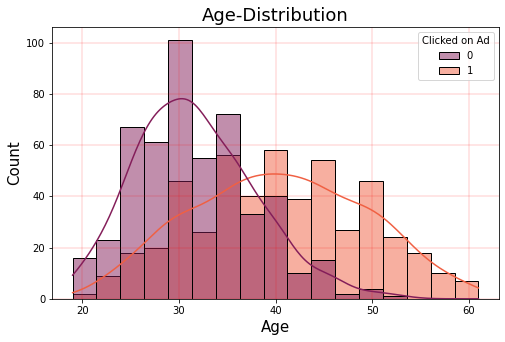

In [66]:
plt.figure(figsize=(8,5))
plt.xlabel('Age',fontsize=15)
plt.ylabel('Count',fontsize=15)
sns.histplot(AD,x=AD['Age'],hue='Clicked on Ad',kde=True,palette='rocket')
plt.grid(color='r',linestyle='-',linewidth=0.2)
plt.title('Age-Distribution',fontsize=18)
plt.show()

Insight: Majority of the users of the webiste who clicked belong to the age of 40. 

2) Jointplot:

a) Income V/S Age

<Figure size 360x720 with 0 Axes>

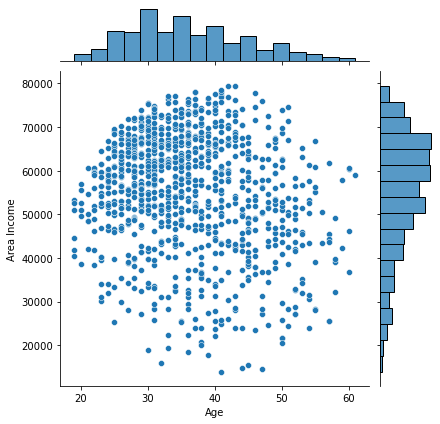

In [47]:
# JointPlot of Income V/S Age.
plt.figure(figsize=(5,10))
sns.jointplot(x=AD['Age'],y=AD['Area Income'],data= AD)
plt.show()

Insight: Major income is generated from the people of age of 25-40. 

b) Daily time spent v/s Age

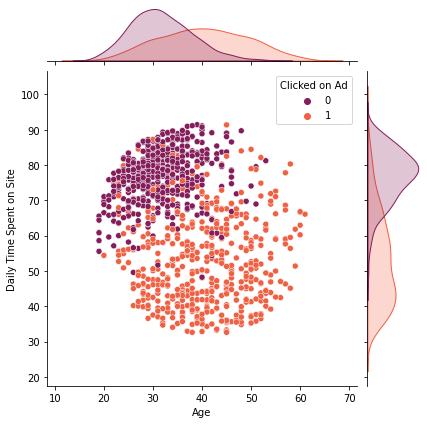

In [65]:
# Kde plot of Daily time spent v/s Age.
sns.jointplot(x=AD['Age'],y=AD['Daily Time Spent on Site'],hue= 'Clicked on Ad' ,data= AD,palette='rocket')
plt.show()

Insight: People of age 30 spend major time on the ads.

c) Daily time spent VS Daily internet usage

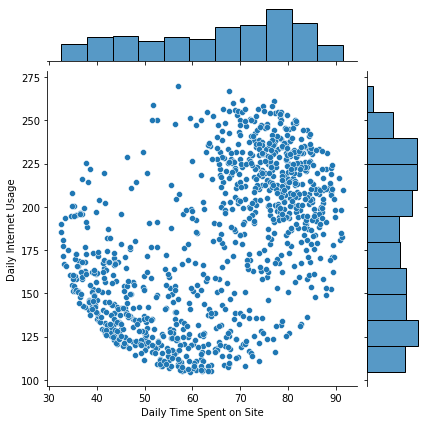

In [64]:
# Joint plot of daily time spent VS Daily internet usage.
sns.jointplot(x= AD['Daily Time Spent on Site'],y=AD['Daily Internet Usage'],data= AD)

3) pairplot:

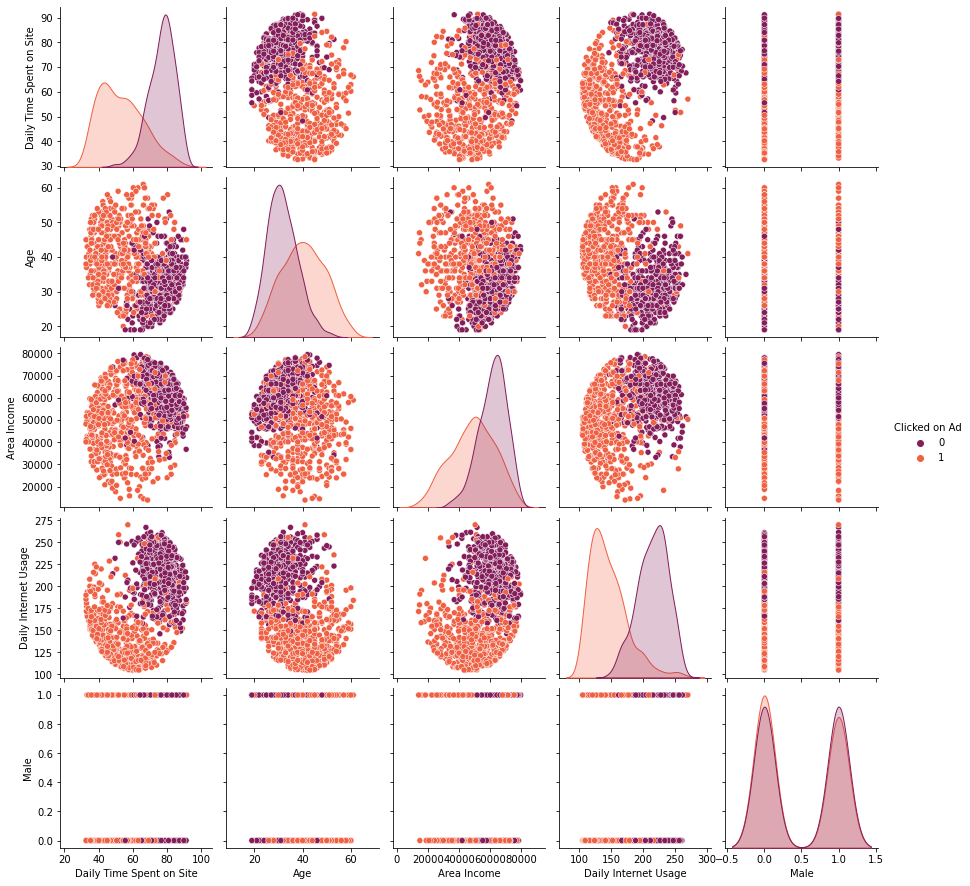

In [63]:
# Creating a pairplot in the database.

sns.pairplot(AD,hue = 'Clicked on Ad',palette='rocket')


# Database Training & Testing:

Logistic reggression:

-In order to accurately predict a variable, it is better to drop categorical variables that have more than 1 class.

-We will be focusing on predicting the area income that is our dependent variable.

-Our indpendent variables will be Age, daily time spent, Daily internet usage, clicked on ad and Sex. 

In [51]:
# Splitting and training the dataset.
from sklearn.model_selection import train_test_split


In [52]:
y= AD['Clicked on Ad']  # Dependent Variabale
X = AD[['Daily Time Spent on Site','Age','Daily Internet Usage','Male','Area Income']]    # Independent Varuiable

In [53]:
# Assigning 30% of the database to testing procedure and 70% of the data to traning procedure.
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [54]:
# Importing logistic regression model.
from sklearn.linear_model import LogisticRegression

In [55]:
Model = LogisticRegression()

In [56]:
Model.fit(X_train,y_train)

LogisticRegression()

In [57]:
# Training Dataset.
print(X_train)   

     Daily Time Spent on Site  Age  Daily Internet Usage  Male  Area Income
541                     75.65   39                247.90     1     64021.55
440                     46.04   32                147.92     0     65499.93
482                     69.42   25                213.38     0     65791.17
422                     53.38   35                120.06     1     60803.37
778                     52.67   44                191.26     0     14775.50
..                        ...  ...                   ...   ...          ...
106                     72.23   25                241.03     1     46557.92
270                     44.49   53                168.00     1     63100.13
860                     91.37   45                182.65     1     51920.49
435                     56.66   42                139.42     0     72684.44
102                     89.91   40                194.23     0     59593.56

[700 rows x 5 columns]


In [58]:
# Training Dataset.
print(y_train)

541    0
440    1
482    0
422    1
778    1
      ..
106    0
270    1
860    1
435    1
102    0
Name: Clicked on Ad, Length: 700, dtype: int64


# Model Testing:

In [59]:
y_Predicted = Model.predict(X_test)
print(y_Predicted)

[0 1 1 1 0 0 0 1 0 1 0 1 1 0 1 1 1 1 0 1 0 1 1 0 0 1 0 0 1 1 0 1 0 1 1 0 0
 0 1 1 0 1 0 1 0 0 1 1 0 1 1 0 1 0 0 0 0 1 0 1 0 1 0 1 1 1 1 0 1 1 1 1 0 0
 1 0 0 1 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 1 0 1 0 1 1 1 0 1 0 1
 0 1 1 0 1 0 0 0 0 1 1 1 0 0 0 1 0 0 1 1 1 1 0 0 0 0 0 0 1 0 0 1 0 0 1 1 0
 0 0 0 0 1 0 1 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1
 1 0 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0 0 0 1 0 1 0 0 0 0 1 1 1 1 0 0 0 0 1 0 0
 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 1 1
 0 0 1 1 0 1 0 1 0 0 1 1 1 1 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 1 1 0 0 0 1 0 1
 0 1 1 0]


In [60]:
# Preparing classification.
from sklearn.metrics import classification_report


In [61]:
# Printing classification report of y actual and predicted values.
print(classification_report(y_test,y_Predicted))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90       146
           1       0.96      0.84      0.89       154

    accuracy                           0.90       300
   macro avg       0.90      0.90      0.90       300
weighted avg       0.90      0.90      0.90       300



Insights:-
1) The precision score of 90 signifies that there are lower false positives cases in the predictions.

2) The recall score of 90 signifies that there are lower false negatives in the prediction. 

Insight: The model shows that there are higher chances for the user to click on the ads.

In [85]:
from sklearn.metrics import confusion_matrix

In [86]:
# Model accuracy details:-
confusion_matrix = confusion_matrix(y_test,y_Predicted)
confusion_matrix  

array([[140,   6],
       [ 25, 129]], dtype=int64)

<Figure size 3600x3600 with 0 Axes>

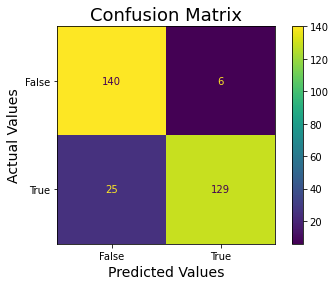

In [114]:
from sklearn import metrics
plt.figure(figsize=(50,50))
confusion_matrix_DP= metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
confusion_matrix_DP.plot()
plt.xlabel('Predicted Values',fontsize=14)
plt.ylabel('Actual Values',fontsize=14)
plt.title('Confusion Matrix',fontsize=18)
plt.show()

Insights:

True Nagetive (TN) Cases = 140

False Positive (FP) Cases = 6

False Negatives (FN) Cases = 25

True Positive (TP) Cases = 129

Accuracy = (TN+TP)/Total Cases


Insights: Therefore, the model has an accuracy of 90%.

# Model Deployment:

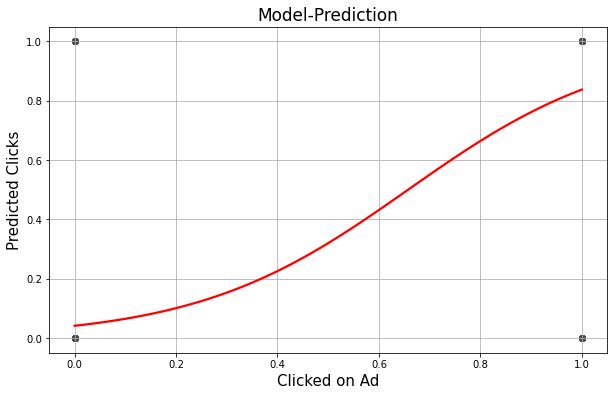

In [112]:
# Plotting the logistic reggression graph.
plt.figure(figsize=(10,6))
plt.xlabel('Clicked On Ad',fontsize=15)
plt.ylabel('Predicted Clicks',fontsize=15)
sns.regplot(x=y_test,y=y_Predicted,data=AD,logistic=True,ci=None,color='.3',line_kws=dict(color="r"))
plt.title('Model-Prediction',fontsize=17)
plt.grid()
plt.show()

Insight: The model shows that there are higher chances for the user will click on the ads.